In [1]:
#please upload the data from your computer
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
   #required libraries 

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')   #take the data and observe
dataset.head()

In [ ]:
data=dataset[['Age','Purchased']]   #take only 2 columns (Age as X, Purchages as Y)
data.head()

In [4]:
#split training and testing data 
X=data[['Age']]
y=data[['Purchased']]
Xn=X-np.mean(X)              #data normalization
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size = 0.2, random_state = 1)

Text(0, 0.5, 'Purchased')

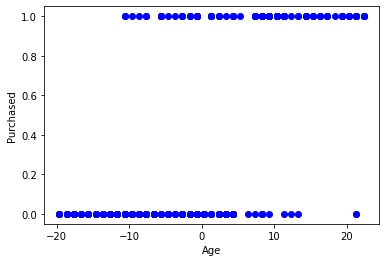

In [5]:
plt.plot(X_train,y_train,'bo')    #observe the training data
plt.xlabel('Age')
plt.ylabel('Purchased')

In [6]:
#create sigmoid function
def sigmoid_x(x):
  P=1/(1+np.exp(-x))  #sigmoid function
  return P

In [7]:
#compute the cost
def compute_cost(X, y, W):
    m = len(y)
    h = sigmoid_x(X @ W)
    epsilon = 1e-2
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [8]:
#gradient decent
def gradient_descent(X, y, params, learning_rate, iterations):       
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid_x(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return cost_history, params

In [9]:
#predict with sigmoid
def predict(X, params):
    return (sigmoid_x(X @ params))

In [10]:
#create sigmoid function  prediction  (did not use in main code)
def pred_x(x,w0,w1):
  k=w0+w1*x
  P=1/(1+np.exp(-k))  #sigmoid function
  return P

In [11]:
m=len(y_train)
x_train = np.hstack((np.ones((m,1)),X_train))
n=np.size(x_train,1)
w = np.zeros((n,1))
iter=1000
learning_rate=.0005
initial_cost = compute_cost(x_train, y_train, w)
y_train=np.array(y_train)
(cost_history, W_new) = gradient_descent(x_train, y_train, w, learning_rate, iter)   #calculate cost and new optimal weight vector
print('The Optimal weight vectors',W_new)


The Optimal weight vectors [[-0.06529668]
 [ 0.16781219]]


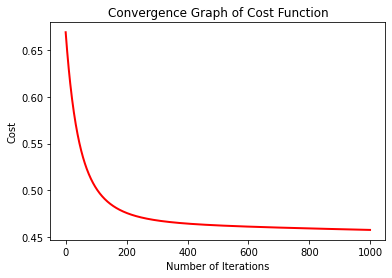

In [12]:
plt.figure()
#sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r',linewidth=2)
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [13]:
y_pred = predict(x_train, W_new)
y_t=np.where(y_pred > 0.5, 1, 0)
#y_t=np.round(y_pred)  #rounding based on threshold value=.5
score = float(sum(y_t == y_train))/ float(len(y_train))
1-score

0.23750000000000004

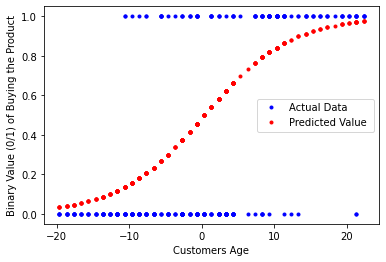

In [14]:

#y_pred=pred_x(X,w0,w1)
#print(y_pred)
#plot for acutual prediction
plt.xlabel('Customers Age')
plt.ylabel('Binary Value (0/1) of Buying the Product')
plt.plot(X_train,y_train,'b.',label='Actual Data')
plt.plot(X_train,y_pred,'r.',label='Predicted Value ')
plt.legend()


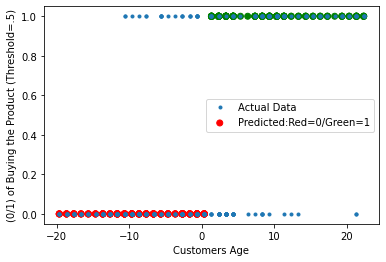

In [15]:
arr1 = X_train
arr2 = y_t
labl = y_t    #calculate the binary classification based on threshold
color= ['red' if l == 0 else 'green' for l in labl]
plt.scatter(arr1, arr2, color=color, label='Predicted:Red=0/Green=1')
plt.xlabel('Customers Age')
plt.ylabel('(0/1) of Buying the Product (Threshold=.5)')
plt.plot(X_train,y_train,'.',label='Actual Data')
plt.legend()


In [16]:
def error_LF(X, y, W):
    pred1=predict(X,W)                  #calculate error on loss function
    pred=np.where(pred1> 0.5, 1, 0)
    MSE=np.sum(np.square(y-pred))
    return MSE

In [17]:
mt=len(y_test)
x_test = np.hstack((np.ones((mt,1)),X_test))
n=np.size(x_test,1)
initial_cost = compute_cost(x_train, y_train, w)
y_test=np.array(y_test)
in_sample_error_MSE =error_LF(x_train, y_train, W_new)
out_sample_error_MSE =error_LF(x_test, y_test, W_new)
print(in_sample_error_MSE,out_sample_error_MSE)




76 18


In [18]:
def error_perc(X1,Y1,W1):
  preds = predict(X1, W1)
  th=np.where(preds > 0.5, 1, 0)
  #print(th)
#y_t=np.round(y_pred)  #rounding based on threshold value=.5
  score1 = float(sum(th == Y1))/ float(len(Y1))
  #print(score1)
  error=(1-score1)*100
  return error


In [19]:
#calculate in sample and out sample percentage error
print(W_new)
insample_percentage_error=error_perc(x_train,y_train,W_new)
outsample_percentage_error=error_perc(x_test,y_test,W_new)
print(insample_percentage_error,outsample_percentage_error)


[[-0.06529668]
 [ 0.16781219]]
23.750000000000004 22.499999999999996


In [20]:
#problem3 varying learning rate 
#I have manually varying the learning rate and try to calculate the prediction
def V_predict(x_train,y_train,learning_rate,iter):
  m=len(y_train)
  #x_train = np.hstack((np.ones((m,1)),X_train))
  n=np.size(x_train,1)
  wn = np.zeros((n,1))
  #iter=1000
  #learning_rate=.0005
  initial_cost = compute_cost(x_train, y_train, w)
  y_train=np.array(y_train)
  cost=[]
  ins=[]
  outs=[]
  for i in learning_rate:
            (cost_history, W_new) = gradient_descent(x_train, y_train, w, i, iter)
            insample_percentage_error=error_perc(x_train,y_train,W_new)
            outsample_percentage_error=error_perc(x_test,y_test,W_new)
            cost.append(cost_history)
            ins.append(insample_percentage_error)
            outs.append(outsample_percentage_error)
     #calculate cost and new optimal weight vector
  return ins,outs,cost



In [21]:
#varying learning rate, epoch=1000 fixed
l=[.0001,.0005,.001,.01,.05,.1]            #[.0001,.0005,.001,.01,.05,.1,.5,1] this l rate start to increase the error
ins,outs,cost=V_predict(x_train,y_train,l,1000)



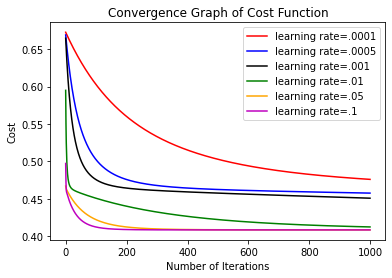

In [22]:
plt.figure()
#sns.set_style('white')
plt.plot(range(len(cost[0])), cost[0], 'r',linewidth=1.5,label='learning rate=.0001')
plt.plot(range(len(cost[1])), cost[1], 'b',linewidth=1.5,label='learning rate=.0005')
plt.plot(range(len(cost[2])), cost[2], 'black',linewidth=1.5,label='learning rate=.001')
plt.plot(range(len(cost[3])), cost[3], 'green',linewidth=1.5,label='learning rate=.01')
plt.plot(range(len(cost[4])), cost[4], 'orange',linewidth=1.5,label='learning rate=.05')
plt.plot(range(len(cost[5])), cost[5], 'm',linewidth=1.5,label='learning rate=.1')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

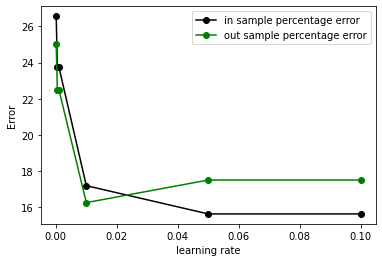

In [23]:
#plot insample and out sample accuracy
plt.plot(l, ins, 'black',marker='o',linewidth=1.5,label='in sample percentage error')
plt.plot(l, outs, 'green', marker='o',linewidth=1.5,label='out sample percentage error')
plt.xlabel("learning rate")
plt.ylabel("Error")
plt.legend()
plt.show()

In [28]:
#problem3 varying iteration rate 
def V_epoch_predict(x_train,y_train,learning_rate,iter):
  m=len(y_train)
  #x_train = np.hstack((np.ones((m,1)),X_train))
  n=np.size(x_train,1)
  wn = np.zeros((n,1))
  #iter=1000
  #learning_rate=.0005
  initial_cost = compute_cost(x_train, y_train, w)
  y_train=np.array(y_train)
  cost=[]
  ins=[]
  outs=[]
  for i in iter:
            (cost_history, W_new) = gradient_descent(x_train, y_train, w, learning_rate, i)
            insample_percentage_error=error_perc(x_train,y_train,W_new)
            outsample_percentage_error=error_perc(x_test,y_test,W_new)
            cost.append(cost_history)
            ins.append(insample_percentage_error)
            outs.append(outsample_percentage_error)
     #calculate cost and new optimal weight vector
  return ins,outs,cost



In [29]:
#varying epoch with our optimum learning rate l=.001
epochx=[500,1000,3000,5000,10000,20000]            
ins,outs,cost=V_epoch_predict(x_train,y_train,.001,epochx)

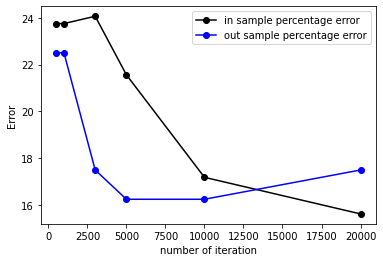

In [30]:
#plot insample and out sample accuracy
plt.plot(epochx, ins, 'black',marker='o',linewidth=1.5,label='in sample percentage error')
plt.plot(epochx, outs, 'blue', marker='o',linewidth=1.5,label='out sample percentage error')
plt.xlabel("number of iteration")
plt.ylabel("Error")
plt.legend()
plt.show()